# Experimento sobre algoritmos de ordenação

##### Autor: Estevão de Carvalho Costa

In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

## 1. Implementações

### 1.1. Heap sort

In [1]:
def heapify(heap_array, i, number_of_nodes):
    maximum = i
    while(i < number_of_nodes):
        left = 2*i + 1
        right = 2*i + 2 
        if(left < number_of_nodes and heap_array[left] > heap_array[i]):
            maximum = left
        if(right < number_of_nodes and heap_array[right] > heap_array[maximum]):
            maximum = right
        if(maximum != i):
            heap_array[maximum], heap_array[i] = heap_array[i], heap_array[maximum]
            i = maximum
        else:
            break

def build_heap(array, number_of_nodes):
    index_of_deepest_non_leaf_node = (number_of_nodes // 2) - 1
    for i in range(index_of_deepest_non_leaf_node, -1, -1):
        heapify(array, i, number_of_nodes)
        
def show_heap_tree(heap_array):
    nodes_buffer = [heap_array[0]]
    current = 0
    number_of_nodes = len(heap_array)
    while(len(nodes_buffer) > 0):
        for node in nodes_buffer:
            print(node, end=' ')
            nodes_buffer = nodes_buffer[1:]
            
            left = 2*current + 1
            right = 2*current + 2
            if(left < number_of_nodes):
                nodes_buffer.append(heap_array[left])
            if(right < number_of_nodes):
                nodes_buffer.append(heap_array[right])
            current += 1
        print()

def heap_sort(array):
    number_of_nodes = len(array)
    build_heap(array, number_of_nodes)
    for i in range(number_of_nodes - 1, 0, -1):
        array[0], array[i] = array[i], array[0]
        number_of_nodes -= 1
        heapify(array, 0, number_of_nodes)


In [2]:
array = [4,10,50,20,1,3,5]
build_heap(array, len(array))
print(array)
show_heap_tree(array)
heap_sort(array)
print(array)

[50, 20, 5, 10, 1, 3, 4]
50 
20 5 
10 1 3 4 
[1, 3, 4, 5, 10, 20, 50]


### 1.2. Quick Sort

In [4]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if(array[j] <= pivot):
            i += 1
            array[i], array[j] = array[j], array[i]
    array[i+1], array[high] = array[high], array[i+1]
    return i + 1

def helper_quick_sort(array, low, high):
    if(high > low):
        middle_index = partition(array, low, high)    
        helper_quick_sort(array, low, middle_index - 1)
        helper_quick_sort(array, middle_index + 1, high)

def quick_sort(array):
    helper_quick_sort(array, 0, len(array) - 1)    
    

In [5]:
array = [78,5,578,8,6,4,5,7,8,5,4,3,56]
quick_sort(array)
print(array)

[3, 4, 4, 5, 5, 5, 6, 7, 8, 8, 56, 78, 578]


### 1.3. Counting Sort e Radix Sort

Os algoritmos Counting Sort e Radix Sort assumem que as chaves de `array` pertencem ao intervalo `[0, maximum_key_value]`

In [6]:
def counting_sort(array, maximum_key_value, key):
    countingLists = []
    for i in range(0, maximum_key_value + 1):
        countingLists.append([])
    n = len(array)
    sorted_array = []*n
    for i in range(0, n):
        countingLists[key(array[i])].append(array[i])
    for i in range(0, maximum_key_value + 1):
          sorted_array.extend(countingLists[i])
    return sorted_array

In [7]:
sorted_array = counting_sort([1,0,4,6,4,3,6,6], 6, lambda number : number)
print(sorted_array)

[0, 1, 3, 4, 4, 6, 6, 6]


In [8]:
def radix_sort(array, digits, base = 10):
    sorted_array = array
    for i in range(0, digits):
        ith_less_significant_digit = lambda number: (number // base**i) % base
        sorted_array = counting_sort(sorted_array, base - 1, ith_less_significant_digit)
    return sorted_array

In [9]:
array = [176,220,123,40,50,1,0,123,312,3,12,3,123,12,123,12,445,67,1233,6664]
sorted_array = radix_sort(array, 4)
print(sorted_array)

[0, 1, 3, 3, 12, 12, 12, 40, 50, 67, 123, 123, 123, 123, 176, 220, 312, 445, 1233, 6664]


#### Nos experimentos a seguir, vamos plotar gráficos comparando, em cada algoritmo implementado, o **tempo de execução** em função do **tamanho do vetor de entrada** de um vetor.

## 2. Setup dos experimentos

In [10]:
def run_experiment_and_plot_results(array_sizes, array_generator, figure_name):
    execution_times = mesure_execution_times_of_sorting_algorithms(array_sizes, array_generator)
    plot_results(array_sizes, execution_times, figure_name)
    
def plot_results(array_sizes, execution_times, figure_name):
    plt.figure(figsize=(10,10))
    plt.plot(array_sizes, execution_times['heap_sort'], 'g', label='Heap Sort')
    plt.plot(array_sizes, execution_times['quick_sort'], 'r', label='Quick Sort')
    plt.plot(array_sizes, execution_times['radix_sort'], 'y', label='Radix Sort')
    plt.title('Comparação de Algoritmos de Ordenação')
    plt.xlabel('Tamanho da entrada (nº de elementos)')
    plt.ylabel('Tempo de execução (segundos)')
    plt.legend()
    plt.savefig(f'{figure_name}.png')
    plt.show()

def __is_sorted(array):
    for i in range(1, len(array)):
        if(array[i-1] > array[i]):
            return False
    return True

def mesure_execution_times_of_sorting_algorithms(array_sizes, array_generator):
    execution_times = {'heap_sort': [], 
                       'quick_sort': [], 
                       'radix_sort': []}
    for n in array_sizes:
#         print("n = ", n, end=' ')
        array = array_generator(n)
        array_copy_1 = array.copy()
        array_copy_2 = array.copy()
#         print('vetores aleatórios gerados', end=' ')
        
        ##### heap sort
        start_time = time.time()
        heap_sort(array)
        execution_time = time.time() - start_time
        execution_times['heap_sort'].append(execution_time)
#         print('heap sort terminou', end=' ')
#         print(__is_sorted(array), end=' ')

        ##### quick sort
        start_time = time.time()
        quick_sort(array_copy_1)
        execution_time = time.time() - start_time
        execution_times['quick_sort'].append(execution_time)
#         print('quick sort terminou', end=' ')
#         print(__is_sorted(array_copy_1))

        ##### radix sort
        maximum_value = n - 1
        digits = len(str(maximum_value))
        start_time = time.time()
        output_array = radix_sort(array_copy_2, digits)
        execution_time = time.time() - start_time
        execution_times['radix_sort'].append(execution_time)
#         print(__is_sorted(output_array))
#         print('radix sort terminou')
#         print()
    
    execution_times['heap_sort'] = np.asarray(execution_times['heap_sort'])
    execution_times['quick_sort'] = np.asarray(execution_times['quick_sort'])
    execution_times['radix_sort'] = np.asarray(execution_times['radix_sort'])
    
    return execution_times

## 3. Experimento 1
#### Deve-se ordenar vetores numéricos onde em média 90% dos elementos têm o mesmo valor. Os demais apresentem valores distintos e distribuídos de maneira uniforme o longo do vetor.
##### Exemplo: n = 20 elementos. 18 deles (90%) são iguais e 2 são diferenetes. 
[40,1,1,1,1,1,1,1,1,1,25,1,1,1,1,1,1,1,1,1]

In [11]:
def generate_array_for_experiment_one(n):
    '''
    Considere o vetor de tamanho n a ser gerado para o experimento 2 segundo a especificação.
    É preciso preencher ele com no mínimo 0,1*n + 1 números diferentes,
    visto que 10% dos elementos do vetor (isso equivale a 0,1*n) serão distintos
    e o resto do vetor será preenchido com um só número.
    Portanto, esta função usa um total de 0,2*n + 1 elementos para se inserir no vetor
    '''
    minimum_possible_value = random.randint(0, (n-1)//2)
    maximum_possible_value = minimum_possible_value + int((0.2*n)) + 1
    possible_keys = [number for number in range(minimum_possible_value, maximum_possible_value)]
    
    random_index = random.randint(0, len(possible_keys) - 1)
    random_duplicate = possible_keys[random_index]
    array = [random_duplicate for i in range(n)]
    del possible_keys[random_index]
    
    number_of_unique_values = int(0.1*n)
    uniform_index = 0
    for i in range(number_of_unique_values):
        random_index = random.randint(0, len(possible_keys) - 1)
        array[uniform_index] = possible_keys[random_index]
        del possible_keys[random_index]
        uniform_index += 10
    return array


### 3.1 Resultados

#### Ordenando vetores pequenos: tamanho = [100, 1000]

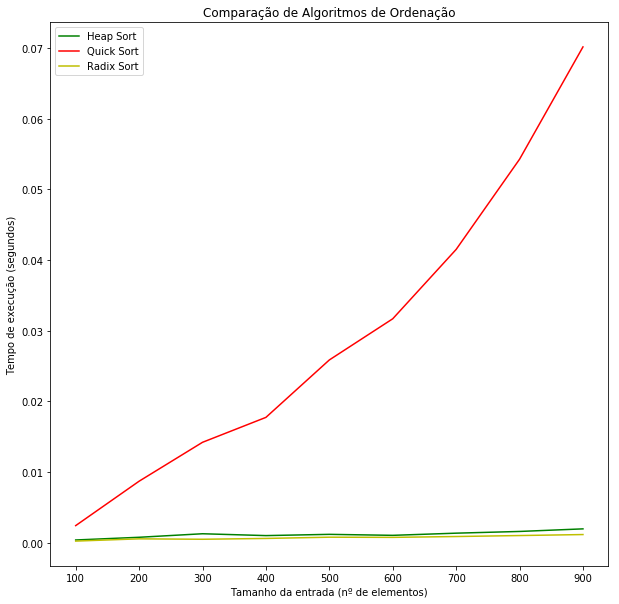

In [14]:
array_sizes = np.arange(100, 1000, 100)
run_experiment_and_plot_results(array_sizes, generate_array_for_experiment_one, 'experimento 1 - vetores pequenos')

## 4. Experimento 2
#### Ordenar vetores onde não há elementos repetidos e chaves foram inseridas de maneira aleatória.

In [49]:
def generate_array_with_unique_random_keys(n):
    possible_keys = [number for number in range(n)]
    array = []
    for i in range(n):
        random_index = random.randint(0, len(possible_keys) - 1)
        array.append(possible_keys[random_index])
        del possible_keys[random_index]
    return array


### 4.1. Resultados

#### Ordenando vetores pequenos: tamanho = [10, 10000]

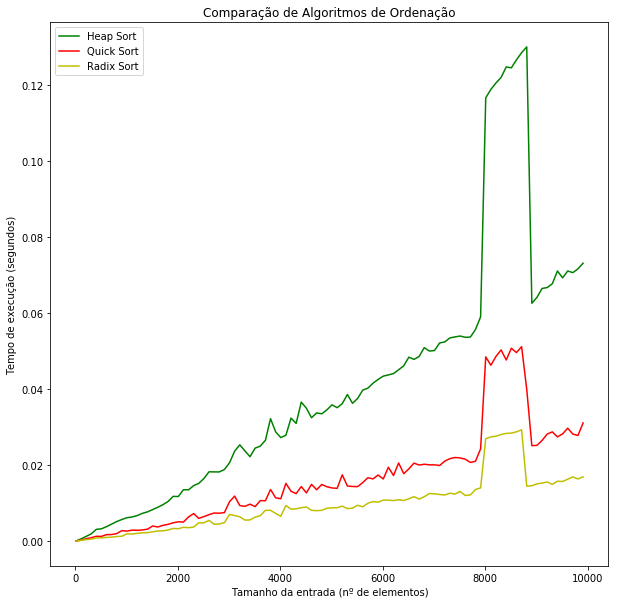

In [50]:
array_sizes = np.arange(10, 10000, 100)
run_experiment_and_plot_results(array_sizes, generate_array_with_unique_random_keys,'resultados_n_de_10_a_10000_passo_100')

##### Nota-se pelo gráfico acima que, entre os tamanhos de entrada 8000 e 9000, houve alguns vetores aleatórios que levaram mais tempo para ordenar do que todos os demais vetores. 

n =  100 vetores aleatórios gerados heap sort terminou True 
n =  500 vetores aleatórios gerados heap sort terminou True 
n =  1000 vetores aleatórios gerados heap sort terminou True 
n =  2000 vetores aleatórios gerados heap sort terminou True 
n =  5000 vetores aleatórios gerados heap sort terminou True 
n =  10000 vetores aleatórios gerados heap sort terminou True 
n =  100000 vetores aleatórios gerados heap sort terminou True 
n =  250000 vetores aleatórios gerados heap sort terminou True 


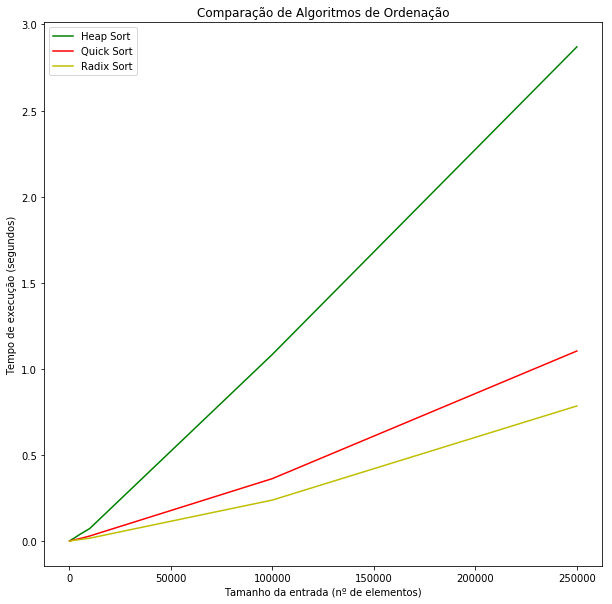

In [45]:
array_sizes = np.array([100, 500, 1000, 2000, 5000, 10000, 100000, 250000])
run_experiment_and_plot_results(array_sizes, generate_array_with_unique_random_keys, 'resultados_depois_de_mudar_o_heap_sort')
